In [148]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [149]:
df = pd.read_excel("price.xlsx")
df.head()

,area,bedroom,price
0,2600,3,550000
1,3000,4,565000
2,3200,3,610000
3,3600,3,595000
4,4000,5,760000


In [150]:
from sklearn import preprocessing
x_scaled = preprocessing.MinMaxScaler()
y_scaled = preprocessing.MinMaxScaler()
Scaled_X = x_scaled.fit_transform(df.drop('price',axis ='columns'))

In [151]:
Scaled_y = y_scaled.fit_transform(df['price'].values.reshape(df.shape[0],1))

## BATCH GRADIENT DESCENT

In [152]:
def batch_gd(X, y_true , epochs, learning_rate = 0.01):
    no_of_fea = X.shape[1]
    w = np.ones(shape=(no_of_fea))
    b = 0
    total_sam = X.shape[0]
    c_list =[]
    e_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w,Scaled_X.T) + b#w1*area +w2*bedrooms +b
        
        w_grad = -(2/total_sam)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total_sam)*np.sum(y_true-y_pred)
        
        w = w -learning_rate*w_grad
        b = b -learning_rate* b_grad
        
        cost = np.mean(np.square(y_pred-y_true))
        if i%10==0 :
            c_list.append(cost)
            e_list.append(i)
            
    return w, b , cost, c_list, e_list


                

        
        

In [153]:
w, b , cost, c_list, e_list = batch_gd(Scaled_X,Scaled_y.reshape(Scaled_y.shape[0],),500)

In [154]:
w, b , cost

(array([0.58867904, 0.57701192]), -0.14323766628236548, 0.011394412598084299)

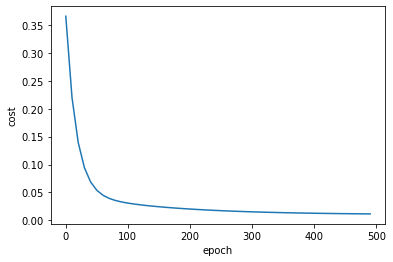

In [155]:
## plotting 
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(e_list,c_list)

In [156]:
def predict(area,bedroom,w,b):
    scaled_x = x_scaled.transform([[area,bedroom]])[0]
    scaled_price = w[0]*scaled_x[0]+ w[1]*scaled_x[1] + b
    return y_scaled.inverse_transform([[scaled_price]])[0][0]
    

In [157]:
predict(2600,3,w,b)

512758.206766585

In [158]:
import random 
random.randint(7,10)

10

In [159]:
def Stochastic_gd(X, y_true , epochs, learning_rate = 0.01):
    no_of_fea = X.shape[1]
    w = np.ones(shape=(no_of_fea))
    b = 0
    total_sam = X.shape[0]
    c_list =[]
    e_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_sam-1)
        x_rand = X[random_index]
        y_rand = y_true[random_index]
        y_pred = np.dot(w,Scaled_X.T) + b#w1*area +w2*bedrooms +b
        
        w_grad = -(2/total_sam)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total_sam)*np.sum(y_true-y_pred)
        
        w = w -learning_rate*w_grad
        b = b -learning_rate* b_grad
        
        cost = np.mean(np.square(y_pred-y_true))
        if i%100==0 :
            c_list.append(cost)
            e_list.append(i)
            
    return w, b , cost, c_list, e_list


In [160]:
w_sgd,b_sgd,cost_sgd,e_list_sgd,c_list_sgd = Stochastic_gd(Scaled_X,Scaled_y.reshape(Scaled_y.shape[0],),1000)

In [161]:
w_sgd,b_sgd,cost_sgd

(array([0.55446305, 0.52884354]), -0.10155591579819316, 0.010103092387144123)

In [162]:
w,b,cost

(array([0.58867904, 0.57701192]), -0.14323766628236548, 0.011394412598084299)

In [165]:
## prediction 
predict(2600,3,w_sgd,b_sgd)

523595.46189246984

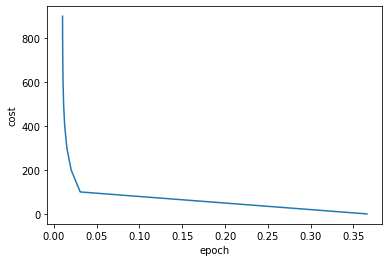

In [187]:
## plotting 
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(e_list_sgd,c_list_sgd)

## MINI BATCH GRADIENT DESCENT

In [195]:
def mini_batch_gd(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    no_of_fea = X.shape[1]
    w = np.ones(shape=(no_of_fea))
    b = 0
    total_sam = X.shape[0]
    
    if batch_size > total_sam:
        batch_size = total_sam
    cost_list =[]
    epoch_list = []
    
    
    num_batches = int(total_sam/batch_size)
    for i in range(epochs):
        random_indices = np.random.permutation(total_sam)
        x_ind = X[random_indices]
        y_ind = y_true[random_indices]
        
        for j in range(0,total_sam,batch_size):
            xj = x_ind[j:j+batch_size]
            yj = y_ind[j:j+batch_size]
            y_pred = np.dot(w,xj.T) + b#w1*area +w2*bedrooms +b

        
            w_grad = -(2/len(xj))*(xj.T.dot(yj- y_pred))
            b_grad = -(2/len(xj))*np.sum(yj-y_pred)
        
            w = w -learning_rate*w_grad
            b = b -learning_rate* b_grad
        
            cost = np.mean(np.square(yj-y_pred))
    if i%10==0 :
        c_list.append(cost)
        e_list.append(i)
            
    return w, b , cost, cost_list, epoch_list


In [196]:
w, b , cost, c_list, e_list = mini_batch_gd(Scaled_X,Scaled_y.reshape(Scaled_y.shape[0],),epochs = 120,batch_size = 5)

In [197]:
w, b , cost

(array([0.64952934, 0.67070189]), -0.22257252969830563, 0.0014808493849206843)

In [198]:
predict(2600,3,w,b)

492131.1422784406

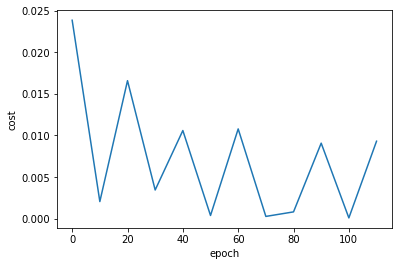

In [200]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)